# Project - 3
# Name : Chinmay Shukla
# Student ID : 202727453

# Q1: Preprocess the data

### Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import dirname, abspath
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Understanding Data

In [65]:
#Reading the data
df = pd.read_csv(r"C:\Users\Chinmay\Desktop\dataset-kidney-stone.csv")

In [66]:
df.head()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [67]:
#Dropping the first column
df = df.drop(['Unnamed: 0'], axis=1)

In [68]:
#Checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  90 non-null     float64
 1   ph       90 non-null     float64
 2   osmo     90 non-null     int64  
 3   cond     90 non-null     float64
 4   urea     90 non-null     int64  
 5   calc     90 non-null     float64
 6   target   90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.0 KB


In [69]:
#checking the dimensions of our data
df.shape

(90, 7)

In [70]:
#number of unique values in each column
cols = df.columns.to_list()
print(cols)
df[cols].nunique()

['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']


gravity    41
ph         80
osmo       85
cond       76
urea       82
calc       86
target      2
dtype: int64

In [71]:
#number of null values in columns
print(df.isnull().sum())

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


In [72]:
#Checking for duplicates
df[df.duplicated()]

,gravity,ph,osmo,cond,urea,calc,target


### Checking for Skewness and Outliers

<Figure size 864x720 with 0 Axes>

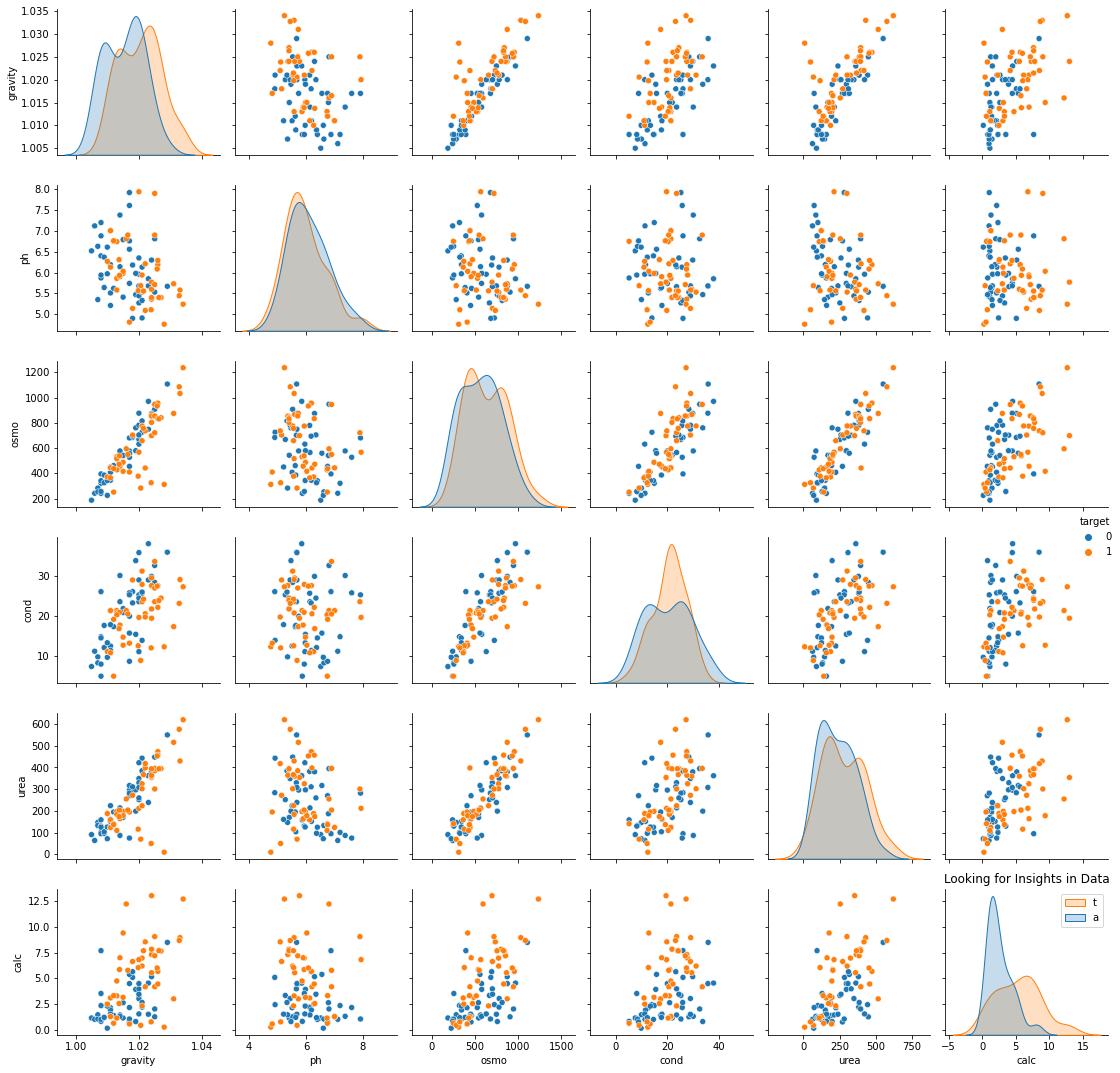

In [73]:
#Checking for skewness
#Pair plots can help us understand the distribution of each variable in the dataset, 
#and identify any potential issues such as skewness or outliers

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,10))
sns.pairplot(df,hue="target")
plt.title("Looking for Insights in Data")
plt.legend("target")
plt.tight_layout()
plt.plot()
plt.show()

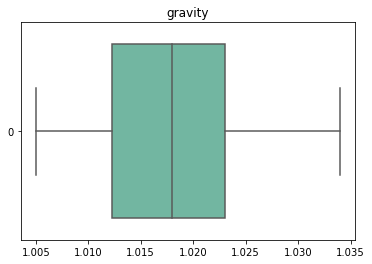

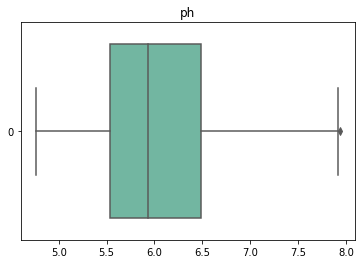

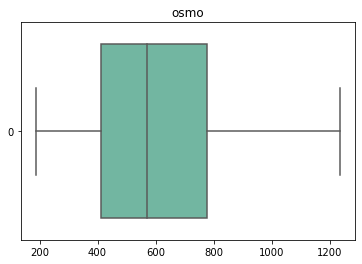

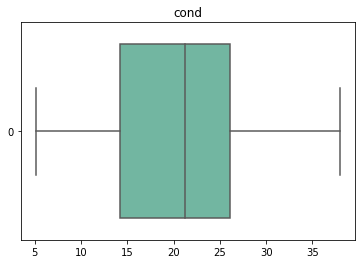

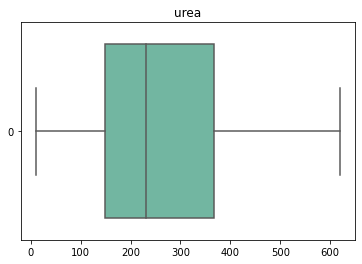

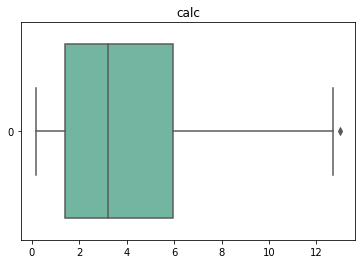

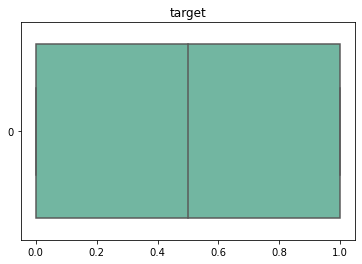

In [74]:
#Checking for outliers
for col in df.columns:
    sns.boxplot(data=df[col], orient='h', palette='Set2')
    plt.title(col)
    plt.show()

We observe outliers in 'calc' and 'ph' columns. 

Since our dataset has limited number of datapoints and has just 2 outliers, we can choose not to remove these outliers to have maximum datapoints in our train dataset

We will remove these datapoints nevertheless for removing outliers

### Remove outliers

In [75]:
print(len(df.skew().loc[df.skew()>0.55]))

2


In [76]:
for index in df.skew().index:
    if df.skew().loc[index] >0.55:
        df[index]=np.cbrt(df[index])

In [77]:
print(len(df.skew().loc[df.skew()>0.55]))

0


### Standardize data

In [78]:
df.skew()

gravity    0.152631
ph         0.506909
osmo       0.298551
cond      -0.016312
urea       0.433230
calc       0.020729
target     0.000000
dtype: float64

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

#Apply Standardscaler for calc
ss = StandardScaler()
df['calc']= ss.fit_transform(df[['calc']])

In [80]:
#Apply Standardscaler for ph
ss = StandardScaler()
df['ph']= ss.fit_transform(df[['ph']])

# Q2: Split the dataset into train and test data

In [81]:
x = df.drop(['target'],axis = 1)
y = df['target']

In [83]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=33)

# Q3: Use extreme gradient boosting (XGBoost) to predict the risk of kidney stones based on the input features

In [90]:
from xgboost import XGBClassifier
import xgboost as xgb

clf_xgb=XGBClassifier()
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
ypred_xgb = clf_xgb.predict(X_test)

# Q4: The evaluation metric is AUC

In [92]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score
precision = precision_score(y_test, ypred_xgb)
recall = recall_score(y_test,ypred_xgb)

print("Precision :",precision)
print("Recall :",recall)

Precision : 1.0
Recall : 0.6666666666666666


In [95]:
auc_score = roc_auc_score(y_test, ypred_xgb)
auc_score

0.8333333333333333

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_xgb)

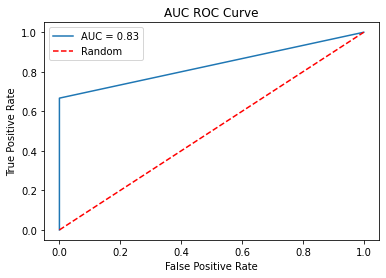

In [98]:
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.legend()
plt.show()

In [99]:
ypred_xgb = clf_xgb.predict(X_train)
precision = precision_score(y_train, ypred_xgb)
recall = recall_score(y_train, ypred_xgb)
print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 1.0


In [100]:
roc_auc = roc_auc_score(y_train, ypred_xgb)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


In [101]:
fpr, tpr, thresholds = roc_curve(y_train, ypred_xgb)

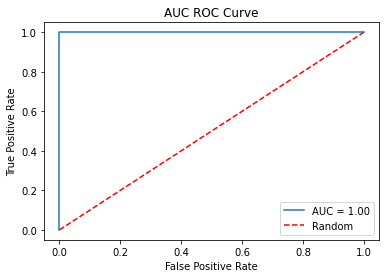

In [102]:
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.legend()
plt.show()

# Q5: Set up a random search CV object and define the hyperparameter grid to search over

In [103]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': np.arange(50, 1000, 50),
    'learning_rate': np.logspace(-3, 0, num=100),
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': np.linspace(0.5, 1.0, num=50),
    'colsample_bytree': np.linspace(0.1, 1.0, num=50),
    'gamma': [0, 1, 5, 10, 50, 100],
}

clf = xgb.XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=100,
                                   scoring='accuracy', n_jobs=-1, cv=5, verbose=2)

# Fit the random search CV object to the training set
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by the random search CV object
print("Best hyperparameters found:")
print(random_search.best_params_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters found:
{'subsample': 0.8979591836734693, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.0030538555088334154, 'gamma': 0, 'colsample_bytree': 0.963265306122449}


In [104]:
# Train an XGBoost model with the best hyperparameters on the entire dataset
clf = xgb.XGBClassifier(random_state=42,**random_search.best_params_)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.963265306122449, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0030538555088334154,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [105]:
ypred_xgb = clf.predict(X_test)

precision = precision_score(y_test, ypred_xgb)
recall = recall_score(y_test, ypred_xgb)
print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 0.8333333333333334


In [106]:
auc_score = roc_auc_score(y_test, ypred_xgb)
auc_score

0.9166666666666667

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_xgb)

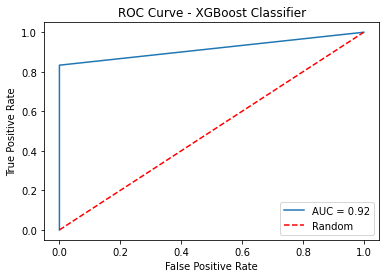

In [108]:
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend()
plt.show()

In [109]:
ypred_xgb = clf_xgb.predict(X_train)

precision = precision_score(y_train, ypred_xgb)
recall = recall_score(y_train, ypred_xgb)
print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 1.0


In [110]:
roc_auc = roc_auc_score(y_train, ypred_xgb)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


In [111]:
fpr, tpr, thresholds = roc_curve(y_train, ypred_xgb)

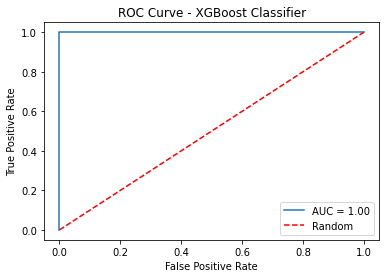

In [112]:
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend()
plt.show()

# Q6. 



### Ans : The precision, recall, and score indicate that the XGBoost model is performing well in this regard, as do the ROC AUC scores for both the training and testing sets. The relatively high precision and recall values and near to one ROC AUC score demonstrate the model's ability to discriminate between the positive and negative classes with reasonable accuracy.

### The best set of hyperparameters are selected from a grid of potential values using RandomizedSearchCV at the stage when the hyperparameters are tweaked. The entire training set is then fitted with the best hyperparameters from the search to create a new XGBoost model. This suggests that the most accurate hyperparameters found by the search can be used to make future predictions.